Датасет - https://www.kaggle.com/datasets/rkiattisak/student-performance-in-mathematics

Предметная область - успеваемость старшеклассников

Источник данных - генератор датасетов

Тип данных - имитационные

Основная задача анализа - выявление зависимостей между различными атрибутами и успеваемостью

Атрибуты датасета:


• Gender: Пол студента (мужчина/женщина)

• Race: Расовое или этническое происхождение студента

• Education: Самый высокий уровень образования, достигнутый родителями или опекунами учащегося

• Lunch: Получает ли студент бесплатный обед или обед по сниженной цене

• Preparation: Прошел ли студент курс подготовки к тестированию

• Math score: Оценка учащегося по стандартизированному тесту по математике

• Reading score: Оценка учащегося по стандартизированному тесту на чтение

• Writing score: Оценка студента по стандартизированному письменному тесту

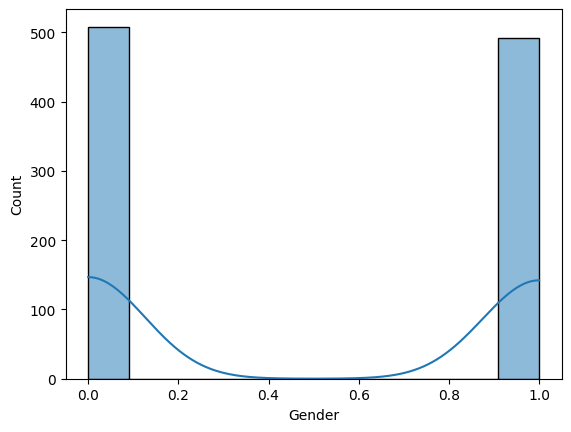

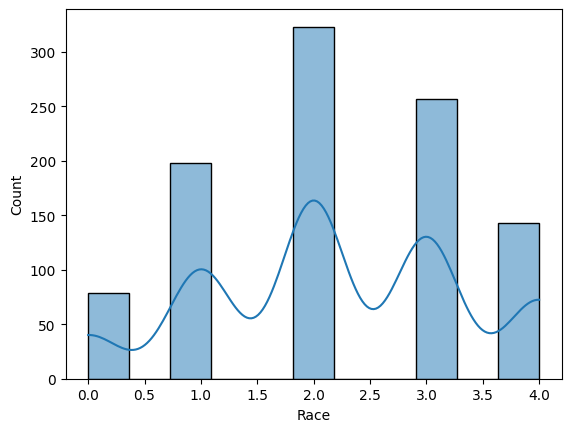

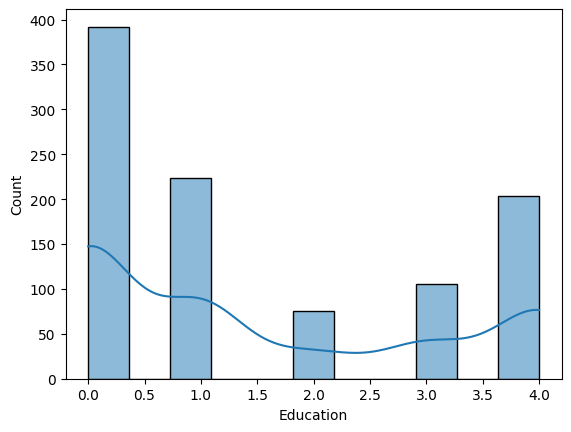

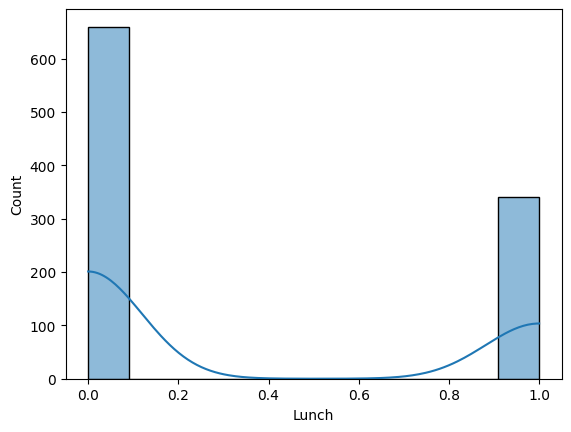

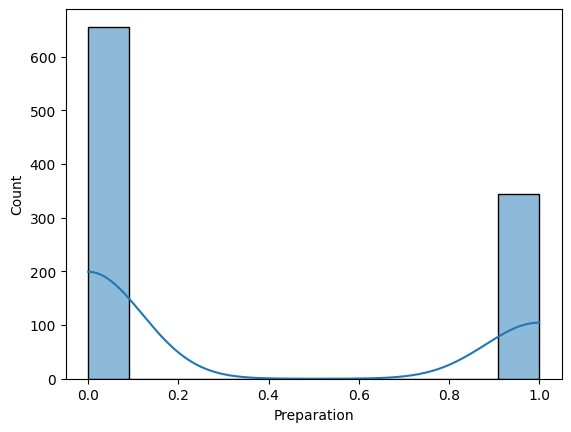

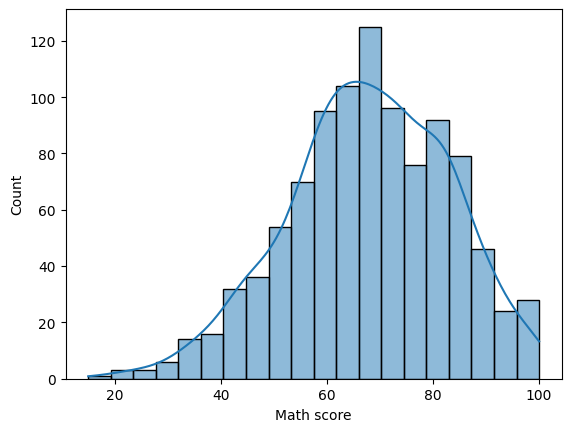

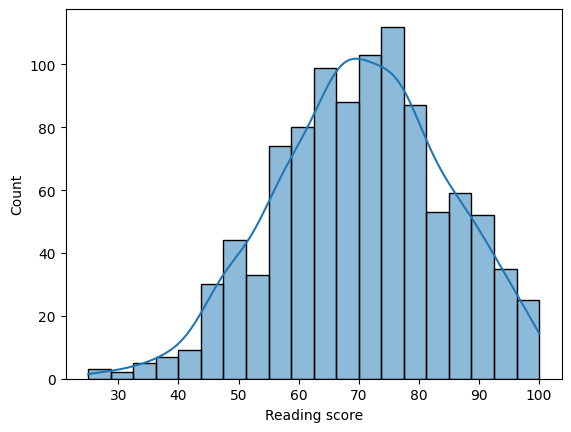

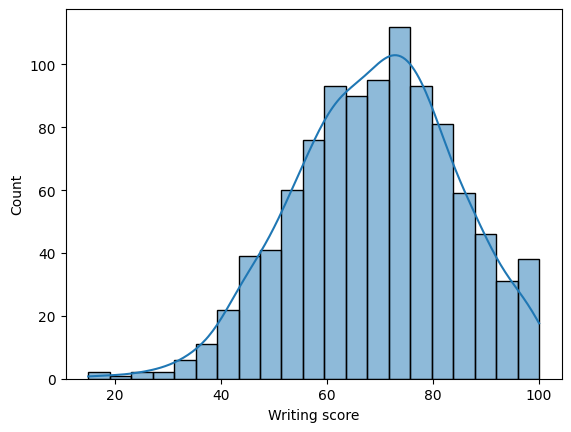

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

names = ['Gender', 'Race', 'Education', 'Lunch', 'Preparation', 'Math score', 'Reading score', 'Writing score']

csv = pd.read_csv('exams.csv', sep=',')
csv.columns = names
df = pd.DataFrame(csv)

# Конвертация параметров в числовые
df['Gender'] = df['Gender'].replace({'male': 0, 'female': 1})
df['Race'] = df['Race'].replace({'group A': 0, 'group B': 1, 'group C': 2, 'group D': 3, 'group E': 4})
df['Education'] = df['Education'].replace({'high school': 0, 'some high school': 0, 'some college': 1,
                                           "master's degree": 2,"bachelor's degree": 3, "associate's degree": 4})
df['Lunch'] = df['Lunch'].replace({'standard': 0, 'free/reduced': 1})
df['Preparation'] = df['Preparation'].replace({'none': 0, 'completed': 1})

for col in df.columns:
    sns.histplot(df[col], kde=True)
    plt.xlabel(col)
    plt.show()

In [2]:
print(df.isnull().sum())

Gender           0
Race             0
Education        0
Lunch            0
Preparation      0
Math score       0
Reading score    0
Writing score    0
dtype: int64


Выбросы в датасете отсутствуют, как и пропущенные значения

In [3]:
# Добавим атрибут со средним количеством баллов за 3 экзамена
df['Average score'] = (df['Math score'] + df['Reading score'] + df['Writing score']) / 3

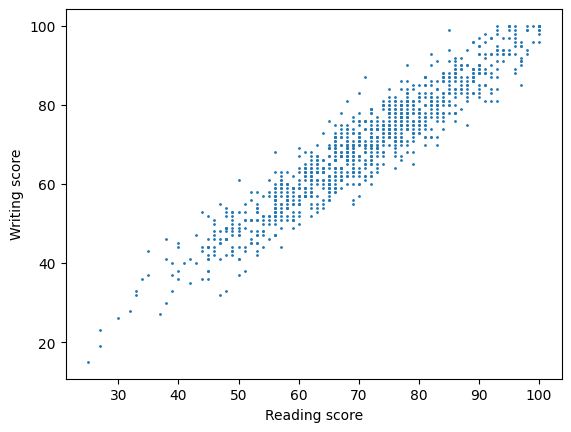

In [4]:
plt.scatter(df['Reading score'], df['Writing score'], s = 1)
plt.xlabel('Reading score')
plt.ylabel('Writing score')
plt.show()

Присутствует одна ярковыраженная группа со значениями баллов за чтение и письмо от 50 до 100. Кучность значений в группе говорит о зависимости между баллами за чтение и баллами за письмо

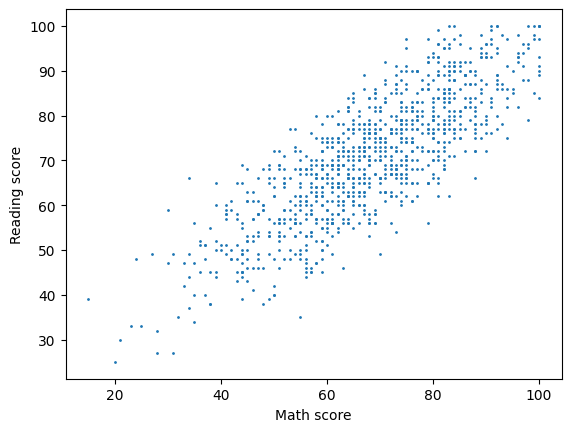

In [5]:
plt.scatter(df['Math score'], df['Reading score'], s = 1)
plt.xlabel('Math score')
plt.ylabel('Reading score')
plt.show()

Присутствует группа с баллами за математику от 50 до 90 и баллами за чтение от 45 до 90. В отличии от предыдущего примера кучность этой группы уже не такая высокая, что говорит о менее прямой зависимости

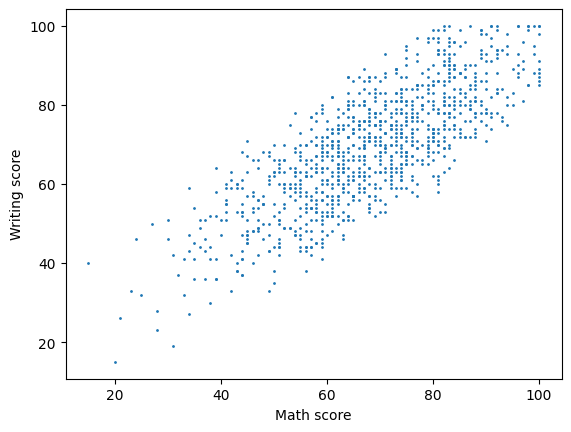

In [6]:
plt.scatter(df['Math score'], df['Writing score'], s = 1)
plt.xlabel('Math score')
plt.ylabel('Writing score')
plt.show()

Присутствует группа с баллами за математику от 50 до 90 и баллами за письмо от 45 до 90. Также, как и в предыдущем примере зависимость выражена не так сильно

In [7]:
from sklearn import preprocessing

# Нормализуем данные при помощи MinMaxScaler
minmax_processed = preprocessing.MinMaxScaler().fit_transform(df)
df_scaled = pd.DataFrame(minmax_processed, index=df.index, columns=df.columns)
df_scaled.sample(5)

,Gender,Race,Education,Lunch,Preparation,Math score,Reading score,Writing score,Average score
553,0.0,0.75,0.00,1.0,0.0,0.388235,0.280000,0.411765,0.350000
417,0.0,0.50,0.25,0.0,0.0,0.717647,0.653333,0.682353,0.679167
839,0.0,0.00,0.25,0.0,1.0,0.482353,0.346667,0.341176,0.379167
273,0.0,0.50,1.00,0.0,0.0,0.894118,0.786667,0.729412,0.800000
818,0.0,1.00,0.25,1.0,1.0,0.670588,0.640000,0.705882,0.666667


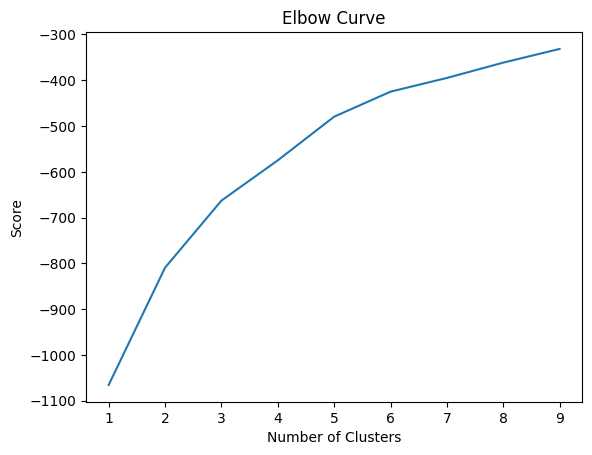

In [8]:
from sklearn.cluster import KMeans
import pylab as pl

# Применим метод KMeans к датасету
Nc = range(1, 10)
kmeans = [KMeans(n_clusters=i, n_init='auto', random_state=5) for i in Nc]
score = [kmeans[i].fit(df_scaled).score(df_scaled) for i in range(len(kmeans))]

# Выведем Elbow Curve для определения количества кластеров
pl.plot(Nc,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

Самый большой "перелом" графика находится на значении 2

In [9]:
# Добавим к изначальному датасету атрибут кластер, вычисленный при помощи метода KMeans
kmeans = KMeans(n_clusters=2, n_init='auto', random_state=5)
kmeans.fit(df_scaled)
df['Cluster'] = kmeans.labels_
df.sample(5)

,Gender,Race,Education,Lunch,Preparation,Math score,Reading score,Writing score,Average score,Cluster
522,0,2,3,1,1,57,65,56,59.333333,1
891,0,2,0,0,0,69,58,52,59.666667,1
57,1,4,0,0,1,89,93,93,91.666667,0
573,0,3,4,0,0,81,74,74,76.333333,1
78,0,0,4,0,1,85,75,74,78.000000,1


In [10]:
# Выведем размеры кластеров
size_array = list(df.groupby(['Cluster']).count()['Average score'].values)
size_array

[492, 508]

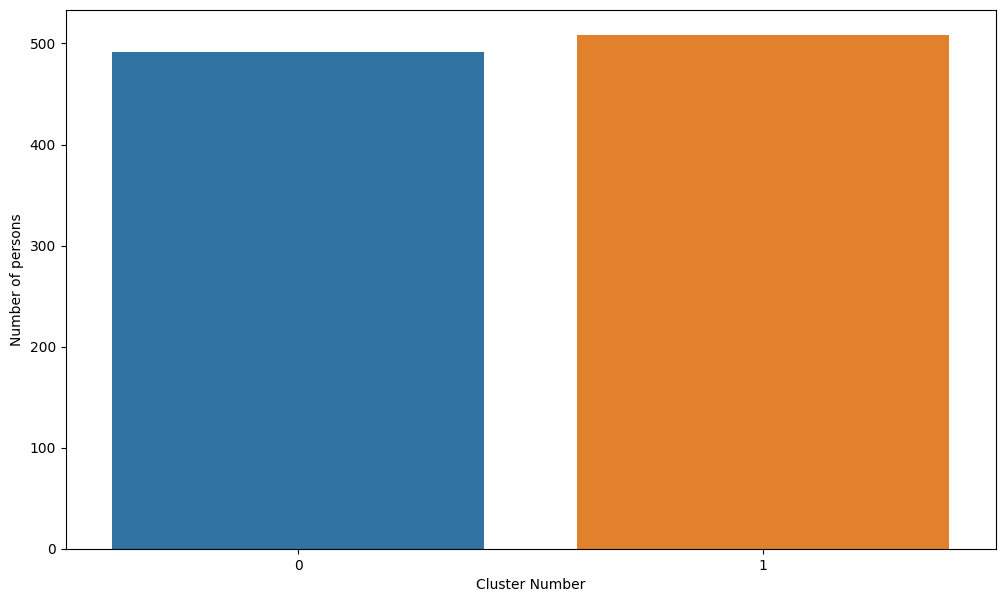

In [11]:
# График распределения учеников по кластерам
plt.figure(figsize=(12,7))
axis = sns.barplot(x=np.arange(0,2,1),y=df.groupby(['Cluster']).count()['Average score'].values)
x=axis.set_xlabel("Cluster Number")
x=axis.set_ylabel("Number of persons")

In [12]:
# Средние значения всех атрибутов в каждом кластере
df.groupby(['Cluster']).mean()

,Gender,Race,Education,Lunch,Preparation,Math score,Reading score,Writing score,Average score
Cluster,,,,,,,,,
0,1.0,2.130081,1.487805,0.347561,0.359756,64.77439,73.473577,73.439024,70.562331
1,0.0,2.242126,1.521654,0.332677,0.328740,70.75000,67.387795,64.976378,67.704724


По этим данным наглядно видно, что разделение по группам произошло на основании полового признака, что довольно логично.

Основные различия в двух группах:

Подготовка: 32.87% учеников проходили курс подготовки, в то время как из учениц курс прошло 35.98% 

Баллы за математику: Ученики получали более высокие баллы по математике, а именно 70.75 в среднем, против 64.77 у учениц

Баллы за чтение и письмо: В письме и чтении ученицы оказались лучше: 73.47 и 73.44 соответственно против 67.39 и 64.98 у учеников

In [13]:
# Пример данных в кластере 0
df[df['Cluster']==size_array.index(sorted(size_array)[0])].sample(10)

,Gender,Race,Education,Lunch,Preparation,Math score,Reading score,Writing score,Average score,Cluster
698,1,4,0,0,0,54,56,56,55.333333,0
661,1,1,1,1,1,47,61,64,57.333333,0
960,1,2,0,0,1,44,69,68,60.333333,0
938,1,1,0,1,0,55,70,60,61.666667,0
673,1,3,3,0,0,58,61,59,59.333333,0
112,1,2,1,0,1,73,86,89,82.666667,0
705,1,0,0,0,0,70,75,70,71.666667,0
191,1,0,0,0,1,64,81,87,77.333333,0
309,1,2,1,0,0,61,64,54,59.666667,0
48,1,4,0,0,0,59,52,56,55.666667,0


In [14]:
# Пример данных в кластере 1
df[df['Cluster']==size_array.index(sorted(size_array)[1])].sample(10)

,Gender,Race,Education,Lunch,Preparation,Math score,Reading score,Writing score,Average score,Cluster
826,0,1,1,0,0,58,47,45,50.000000,1
841,0,2,1,1,1,62,72,67,67.000000,1
592,0,0,4,0,0,60,56,57,57.666667,1
776,0,0,0,1,0,70,74,65,69.666667,1
320,0,2,0,0,1,62,71,62,65.000000,1
484,0,2,3,0,0,73,67,73,71.000000,1
999,0,3,0,0,0,58,47,45,50.000000,1
416,0,2,1,0,0,90,76,71,79.000000,1
549,0,4,0,0,1,84,79,75,79.333333,1
741,0,3,0,0,0,80,80,79,79.666667,1


Подводя итоги:

Расовое или этническое происхождение, образование родителей и плата за обеды практически не влияют на оценки


Ученицы чаще готовятся к экзаменам и имеют более высокие баллы по чтению и письму


Ученики реже готовятся к экзаменам, но имеют более высокие баллы по математике


За счёт чтения и письма средний балл учениц немного выше, чем у учеников


Довольно сложно оценить эффективность подготовки к экзаменам из-за склонности учеников к математике, а учениц к чтению и письму, но исходя из среднего балла можно сказать, что подготовка точно положительно влияет на успеваемость